애플주식 데이터 수집하여 저장하기

In [1]:
# 주식데이터 조회를 위한 Symbol 조회
# https://github.com/financedata-org/FinanceDataReader
import FinanceDataReader as fdr
df_stocklist = fdr.StockListing('NASDAQ')
df_stocklist.info()
df_stocklist.head()

100%|██████████| 4201/4201 [00:11<00:00, 368.91it/s]


,Symbol,Name,Industry,IndustryCode
0,AAPL,Apple Inc,전화 및 소형 장치,57106020
1,MSFT,Microsoft Corp,소프트웨어,57201020
2,AMZN,Amazon.com Inc,백화점,53402010
3,NVDA,NVIDIA Corp,반도체,57101010
4,GOOGL,Alphabet Inc Class A,온라인 서비스,57201030


In [3]:
# 라이브러리 불러오기
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import FinanceDataReader as fdr

import os, pendulum

In [5]:
# 애플 주식 데이터 수집
df_stock_apple = fdr.DataReader('AAPL','2022')

# 데이터 확인
df_stock_apple.info()
df_stock_apple

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 410 entries, 2022-01-03 to 2023-08-21
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       410 non-null    float64
 1   High       410 non-null    float64
 2   Low        410 non-null    float64
 3   Close      410 non-null    float64
 4   Adj Close  410 non-null    float64
 5   Volume     410 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 22.4 KB


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-01-03,177.830002,182.880005,177.710007,182.009995,180.190964,104487900
2022-01-04,182.630005,182.940002,179.119995,179.699997,177.904053,99310400
2022-01-05,179.610001,180.169998,174.639999,174.919998,173.171829,94537600
2022-01-06,172.699997,175.300003,171.639999,172.000000,170.281021,96904000
2022-01-07,172.889999,174.139999,171.029999,172.169998,170.449310,86709100
...,...,...,...,...,...,...
2023-08-15,178.880005,179.479996,177.050003,177.449997,177.449997,43622600
2023-08-16,177.130005,178.539993,176.500000,176.570007,176.570007,46964900
2023-08-17,177.139999,177.509995,173.479996,174.000000,174.000000,66062900


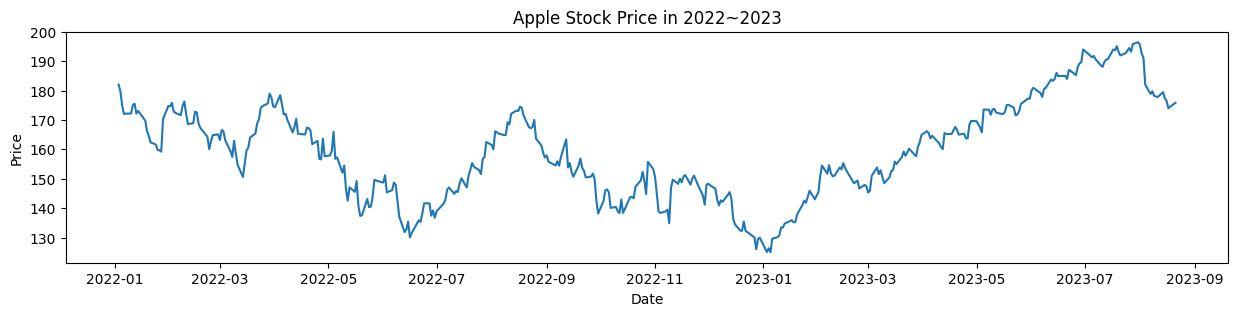

In [7]:
# 주식 가격 시각화하기
fig, ax = plt.subplots()
fig.set_size_inches(15,3)

sns.lineplot(data=df_stock_apple, x=df_stock_apple.index, y='Close')

ax.set_title('Apple Stock Price in 2022~2023')
ax.set_xlabel('Date')
ax.set_ylabel('Price')

plt.show()

In [13]:
#한달 간격으로 다운샘플링
df_stock_apple_monthend = df_stock_apple.resample("BM").mean()
df_stock_apple_per10day = df_stock_apple.resample("10d").mean()
print(len(df_stock_apple_monthend), len(df_stock_apple_per10day))
df_stock_apple_monthend.head(), df_stock_apple_per10day.head()

20 60


(                  Open        High         Low       Close   Adj Close  \
 Date                                                                     
 2022-01-31  170.201500  172.447999  167.639500  169.861500  168.163883   
 2022-02-28  169.635262  171.585263  167.580524  169.830001  168.312170   
 2022-03-31  164.806956  167.164348  162.939131  165.310435  163.866818   
 2022-04-29  167.479001  169.518500  165.083002  166.820999  165.364190   
 2022-05-31  148.324286  150.950952  145.364284  148.430477  147.306044   
 
                   Volume  close_rtn  
 Date                                 
 2022-01-31  1.054223e+08  -0.001912  
 2022-02-28  8.565875e+07  -0.002880  
 2022-03-31  9.481740e+07   0.002622  
 2022-04-29  8.438978e+07  -0.004878  
 2022-05-31  1.143353e+08  -0.002270  ,
                   Open        High         Low       Close   Adj Close  \
 Date                                                                     
 2022-01-03  175.397501  177.536249  173.493751  

In [14]:
# 수익률 추가하기
# df_stock_apple['close_rtn'] = df_stock_apple['Close'].pct_change()
df_stock_apple_per10day['close_rtn'] = df_stock_apple_per10day['Close'].pct_change()
# df_stock_apple.head()
df_stock_apple_per10day.head()

,Open,High,Low,Close,Adj Close,Volume,close_rtn
Date,,,,,,,
2022-01-03,175.397501,177.536249,173.493751,175.449999,173.696529,9.245726e+07,NaN
2022-01-13,170.004997,171.671664,167.451665,168.035001,166.355634,9.416462e+07,-0.042263
2022-01-23,164.975715,167.639999,161.777143,165.718571,164.062367,1.271449e+08,-0.013785
2022-02-02,173.502499,175.091251,171.624996,173.082498,171.516018,8.371248e+07,0.044436
2022-02-12,170.208002,171.663998,168.304001,170.080002,168.594733,7.245046e+07,-0.017347


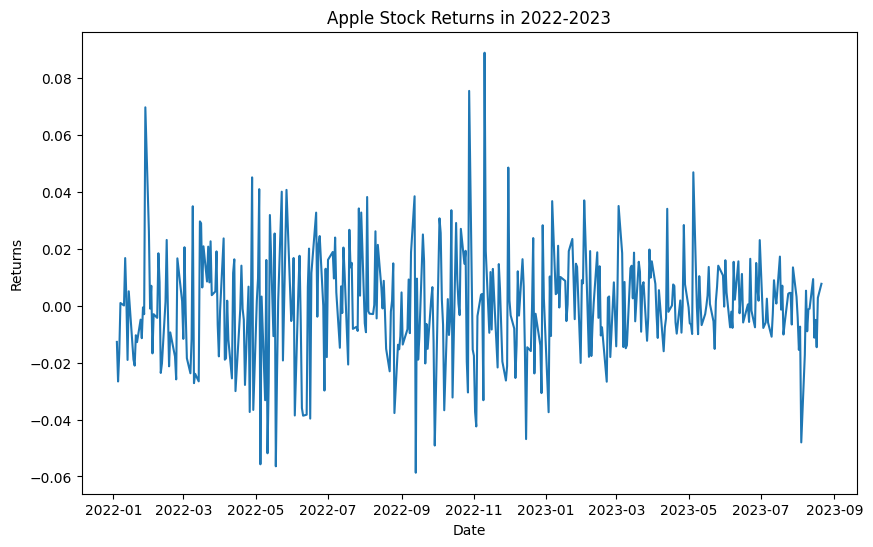

In [16]:
fig, ax = plt.subplots()
fig.set_size_inches(10, 6)

sns.lineplot(data=df_stock_apple, x=df_stock_apple.index, y='close_rtn')
# sns.lineplot(data=df_stock_apple_per10day, x=df_stock_apple_per10day.index, y='close_rtn')

ax.set_title('Apple Stock Returns in 2022-2023')
ax.set_xlabel('Date')
ax.set_ylabel('Returns')

plt.show()

In [24]:
df_stock_apple['close_ma'] = df_stock_apple['Close'].rolling(2).mean()
df_stock_apple

,Open,High,Low,Close,Adj Close,Volume,close_rtn,close_ma
Date,,,,,,,,
2022-01-03,177.830002,182.880005,177.710007,182.009995,180.190964,104487900,NaN,NaN
2022-01-04,182.630005,182.940002,179.119995,179.699997,177.904053,99310400,-0.012692,180.854996
2022-01-05,179.610001,180.169998,174.639999,174.919998,173.171829,94537600,-0.026600,177.309998
2022-01-06,172.699997,175.300003,171.639999,172.000000,170.281021,96904000,-0.016693,173.459999
2022-01-07,172.889999,174.139999,171.029999,172.169998,170.449310,86709100,0.000988,172.084999
...,...,...,...,...,...,...,...,...
2023-08-15,178.880005,179.479996,177.050003,177.449997,177.449997,43622600,-0.011200,178.455002
2023-08-16,177.130005,178.539993,176.500000,176.570007,176.570007,46964900,-0.004959,177.010002
2023-08-17,177.139999,177.509995,173.479996,174.000000,174.000000,66062900,-0.014555,175.285003


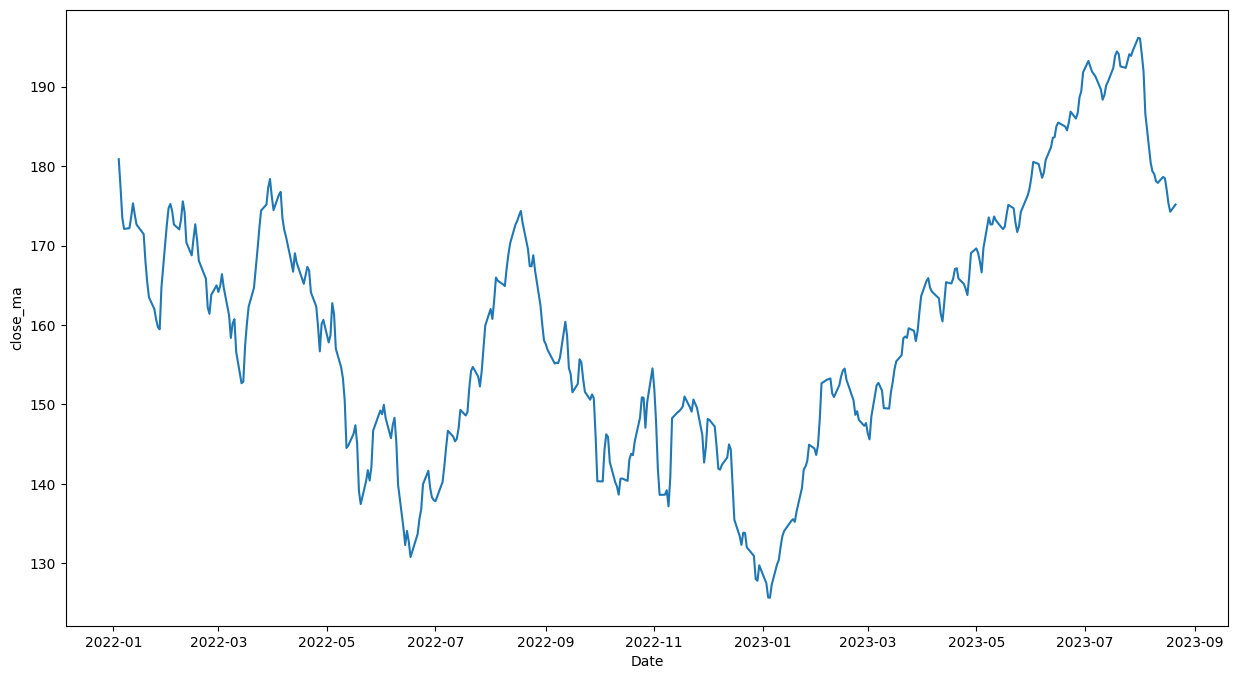

In [25]:
# df_month.iloc[:,[3,7]].plot(figsize=(15,8))

df_stock_apple_monthend00 = df_stock_apple.iloc[:,[3,7]].dropna()

fig, ax = plt.subplots()
fig.set_size_inches(15,8)

sns.lineplot(data=df_stock_apple, x=df_stock_apple.index, y='close_ma')

plt.show()


In [27]:
last_close = df_stock_apple['close_ma'].iloc[-2] # 이동평균선 60일 전 종가
print(last_close)
price = df_stock_apple['Close'].iloc[-1] # 오늘 종가
print(price)
if price > last_close:
    print('상승 장')
elif price < last_close:
    print('하락 장')
else:
    print('변화없음')

174.2450025
175.839996
상승 장


In [29]:
file_path = './Data02/'
file_date = pendulum.now().to_date_string()
file_name = 'apple_data.csv'
df_stock_apple.to_csv(file_path+file_date+'_'+file_name)